In [24]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [25]:
# Load the data 
training_data = pd.read_csv("sales_train.csv")

# Training Data Table

In [26]:
training_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [27]:
df = training_data[['shop_id']]
df[['item_id']] = training_data[['item_id']]
df[['item_cnt']] = training_data[['item_cnt_day']]
df

C:\Users\Kushal\Anaconda3\envs\ML\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,shop_id,item_id,item_cnt
0,59,22154,1.0
1,25,2552,1.0
2,25,2552,-1.0
3,25,2554,1.0
4,25,2555,1.0
...,...,...,...
2935844,25,7409,1.0
2935845,25,7460,1.0
2935846,25,7459,1.0
2935847,25,7440,1.0


In [28]:
# No. of days you want to predict the sales
forecast_out = 1
# Create 3 new columns, one of which will be target value, shifted by n units.
df['shift_shop_id'] = df[['shop_id']].shift(-forecast_out)
df['shift_item_id'] = df[['item_id']].shift(-forecast_out)
df['shift_item_cnt'] = df[['item_cnt']].shift(-forecast_out)
df

C:\Users\Kushal\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Kushal\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,shop_id,item_id,item_cnt,shift_shop_id,shift_item_id,shift_item_cnt
0,59,22154,1.0,25.0,2552.0,1.0
1,25,2552,1.0,25.0,2552.0,-1.0
2,25,2552,-1.0,25.0,2554.0,1.0
3,25,2554,1.0,25.0,2555.0,1.0
4,25,2555,1.0,25.0,2564.0,1.0
...,...,...,...,...,...,...
2935844,25,7409,1.0,25.0,7460.0,1.0
2935845,25,7460,1.0,25.0,7459.0,1.0
2935846,25,7459,1.0,25.0,7440.0,1.0
2935847,25,7440,1.0,25.0,7460.0,1.0


In [29]:
x = np.array(df.drop(['shift_item_cnt'],1))
x = x[:-forecast_out]
x

array([[ 5.9000e+01,  2.2154e+04,  1.0000e+00,  2.5000e+01,  2.5520e+03],
       [ 2.5000e+01,  2.5520e+03,  1.0000e+00,  2.5000e+01,  2.5520e+03],
       [ 2.5000e+01,  2.5520e+03, -1.0000e+00,  2.5000e+01,  2.5540e+03],
       ...,
       [ 2.5000e+01,  7.4600e+03,  1.0000e+00,  2.5000e+01,  7.4590e+03],
       [ 2.5000e+01,  7.4590e+03,  1.0000e+00,  2.5000e+01,  7.4400e+03],
       [ 2.5000e+01,  7.4400e+03,  1.0000e+00,  2.5000e+01,  7.4600e+03]])

In [30]:
y = np.array(df['shift_item_cnt'])
y = y[:-forecast_out]
y

array([ 1., -1.,  1., ...,  1.,  1.,  1.])

In [31]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
#Create and train the Support Vector Machine(Regression)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

In [10]:
new_sub = zip(sub,shifted_sub)
list(new_sub)

[('shop_id', 'shop_id'),
 ('item_id', 'item_id'),
 ('item_cnt_day', 'item_cnt_day')]

In [6]:
# Need to plot the data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


# Sales Over Time

In [42]:
subset = training_data.groupby( ["date_block_num"])["item_cnt_day"].sum()
subset

SyntaxError: EOL while scanning string literal (<ipython-input-42-c26bcbc79653>, line 1)

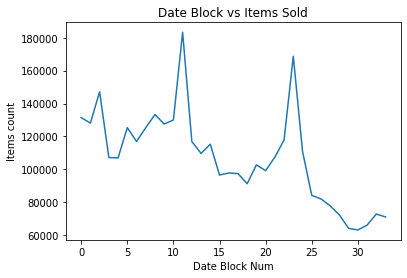

In [8]:
plt.xlabel("Date Block Num")
plt.ylabel("Items count")
plt.title("Date Block vs Items Sold")
plt.plot(subset)

From the graph we can see that there is a clear seasonality to the data, with two pronounced peaks. It is also interesting to note that a downward trend is apparent, although this is no conclusive

In [45]:
subset_date = training_data.groupby(["date"])["item_cnt_day"].sum()


,shop_id
0,59
1,25
2,25
3,25
4,25
...,...
2935844,25
2935845,25
2935846,25
2935847,25


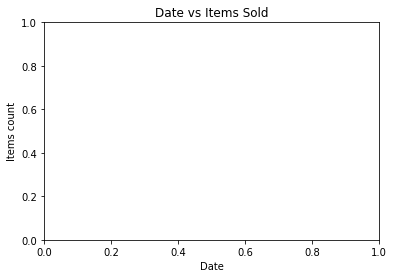

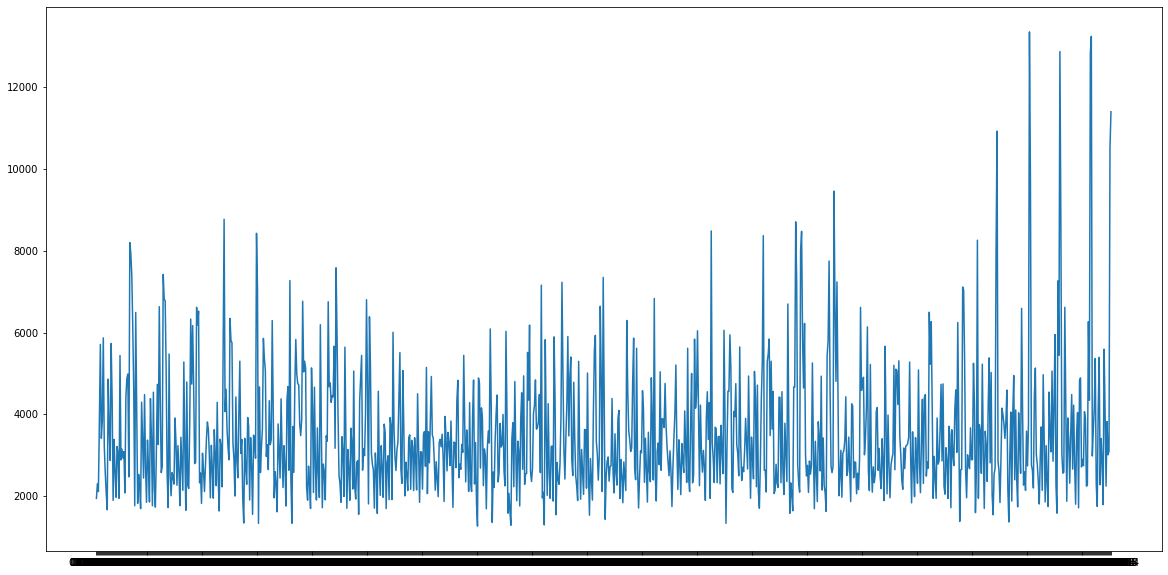

In [36]:
plt.xlabel("Date")
plt.ylabel("Items count")
plt.title("Date vs Items Sold")
plt.figure(figsize=(20,10))
plt.plot(subset_date)

# Item Popularity

In [17]:
itemid_subset = training_data.groupby(["item_id"])["item_cnt_day"].sum()
itemid_subset

item_id
0           1.0
1           6.0
2           2.0
3           2.0
4           1.0
          ...  
22165       2.0
22166     348.0
22167    1320.0
22168       6.0
22169       1.0
Name: item_cnt_day, Length: 21807, dtype: float64

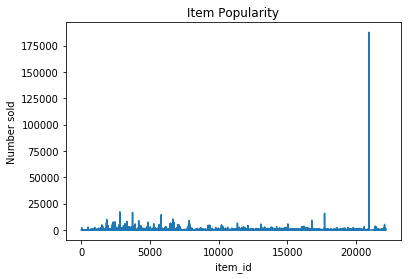

In [18]:
plt.title("Item Popularity")
plt.xlabel("item_id")
plt.ylabel("Number sold")
plt.plot(itemid_subset)

We can clearly see that 

In [38]:
shopid_subset = training_data.groupby(["shop_id","item_id","date"])["item_cnt_day"].sum()
shopid_subset

shop_id  item_id  date      
0        30       15.02.2013    2.0
                  16.02.2013    9.0
                  17.02.2013    4.0
                  18.02.2013    4.0
                  20.02.2013    2.0
                               ... 
59       22164    30.04.2015    1.0
         22167    03.12.2013    1.0
                  14.06.2014    1.0
                  14.12.2013    1.0
                  25.10.2013    1.0
Name: item_cnt_day, Length: 2935821, dtype: float64

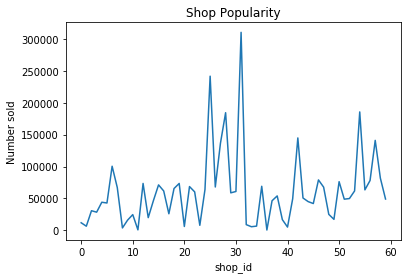

In [26]:
plt.title("Shop Popularity")
plt.xlabel("shop_id")
plt.ylabel("Number sold")
plt.plot(shopid_subset)

In [33]:
shopid_itemid_subset = training_data.groupby(["shop_id","item_id","date_block_num"])["item_cnt_day"].sum()
shopid_itemid_subset.head(100)

shop_id  item_id  date_block_num
0        30       1                 31.0
         31       1                 11.0
         32       0                  6.0
                  1                 10.0
         33       0                  3.0
                                    ... 
         963      1                  2.0
         965      0                  1.0
         970      1                  1.0
         971      1                  1.0
         987      0                  2.0
Name: item_cnt_day, Length: 100, dtype: float64